# Project: Wrangling and Analyze Data

## Table Of Content  
* Introduction  
* Data Gathering  
* Accessing Data  
* Cleaning Data  
* Analyzing and Visualization of Data

### 1. Introduction  
This is a project done in fulfilment of the requirements of the Udacity nanodegree. In this project, I will be using Python and its libraries to gather data from variety of sources and in variety of formats, access the quality and tidiness of the gathered data, and then proceed to clean it.
This project aims to bring to fore the utilisation of all learnt in the Data wrangling module of the nanodegree.  

The dataset I will be wrangling, analyzing, visualising and drawing insights from, is the tweet archive of a Twitter account that rates people's dogs with a humorous comment about the dog. The ratings of these dogs as seen int the Twitter account almost always have a denominator of 10 while the nemurator has rating mostly above 10. At the end of this project I hope to pose and answer some questions regarding the datasets worked with and draw some insights from such answers.

### Importing Libraries.

In [1]:

import os 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np 
import requests
import json 
import tweepy
import seaborn as sns

## 1.0 Data Gathering
In the cells below, I will gather **all** three pieces of data for this project and load them in this notebook.  

#### 1.1 Twitter archive data (twitter_archive_enhanced.csv)

In [2]:
#  Read provided csv file.
twitter_archive_enhanced = pd.read_csv('twitter-archive-enhanced.csv')

#### 1.2 Using the Requests library to download the tweet image prediction (image_predictions.tsv)

In [3]:
from urllib import response

# Create a file directory for image predictions

folder_name = 'image_predictions'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)
# Create the request using get method
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

# Access and write content to file
with open(os.path.join(folder_name, url.split('/')[-1]), mode='wb') as file:
        file.write(response.content)

In [4]:
# Test to be sure above procedure worked
os.listdir(folder_name)

['image-predictions.tsv']

In [5]:
# Read file
image_predictions = pd.read_csv('image_predictions/image-predictions.tsv', sep='\t')

#### 1.3 Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

Upon viewing the twitter archive data, it is discovered that some useful information are missing. These include the counts of likes (favorites) and retweets. And these will play a vital role in analysing data. I will therefore need to use Tweepy Library to get such missing info from the Twitter API.

In [6]:
# I will be using the the data provided by Udacity as I did not create a Twitter developer account. However, below is how the data was gatthered using Tweepy.
# This cell is not to be run. 

""" import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = twitter_archive_enhanced.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)"""


' import tweepy\nfrom tweepy import OAuthHandler\nimport json\nfrom timeit import default_timer as timer\n\n# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file\n# These are hidden to comply with Twitter\'s API terms and conditions\nconsumer_key = \'HIDDEN\'\nconsumer_secret = \'HIDDEN\'\naccess_token = \'HIDDEN\'\naccess_secret = \'HIDDEN\'\n\nauth = OAuthHandler(consumer_key, consumer_secret)\nauth.set_access_token(access_token, access_secret)\n\napi = tweepy.API(auth, wait_on_rate_limit=True)\n\n# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:\n# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to\n# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv\n# NOTE TO REVIEWER: this student had mobile verification issues so the following\n# Twitter API code was sent to this student from a Udacity instructor\n# Tweet IDs for which to gather additional data via Twitter\'s API\ntweet_ids = twitte

#### 1.4 Read downloaded json file line by line into a dataframe

In [7]:
# Open json file
df_list = []

with open('tweet-json.txt') as file:
    for line in file:
        df_list.append(json.loads(line))

#Read json file into dataframe
tweet_data = pd.DataFrame(df_list , columns = ['id' , 'retweet_count' , 'favorite_count'])

## 2.0 Assessing Data
In this section, I will be using both visual and programmatic assessement to assess the data, detect and document quality and tidiness issues.  


* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.



### 2.1 Twitter Archive Data 

In [8]:
twitter_archive_enhanced.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
113,870726314365509632,8.707262e+17,16487760.0,2017-06-02 19:38:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@ComplicitOwl @ShopWeRateDogs &gt;10/10 is res...,NaN,NaN,NaN,NaN,10,10,None,None,None,None,None
1899,674670581682434048,NaN,NaN,2015-12-09 19:22:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jeb &amp; Bush. Jeb is somehow stuck in t...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/674670581...,9,10,Jeb,None,None,None,None
250,845098359547420673,NaN,NaN,2017-03-24 02:22:04 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Bungalo. She uses that ...,7.733088e+17,4.196984e+09,2016-09-06 23:56:05 +0000,https://twitter.com/dog_rates/status/773308824...,12,10,Bungalo,None,None,None,None
1395,699801817392291840,NaN,NaN,2016-02-17 03:45:29 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cooper. He began to tear up when his b...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/699801817...,11,10,Cooper,None,None,pupper,None
1220,714606013974974464,NaN,NaN,2016-03-29 00:12:05 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here are two lil cuddly puppers. Both 12/10 wo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/714606013...,12,10,None,None,None,None,None


In [9]:
twitter_archive_enhanced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [10]:
twitter_archive_enhanced.shape

(2356, 17)

In [11]:
twitter_archive_enhanced.isna().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [12]:
twitter_archive_enhanced.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [13]:
twitter_archive_enhanced['name'].nunique()

957

In [14]:
sum(twitter_archive_enhanced.name.duplicated())

1399

In [15]:
twitter_archive_enhanced[twitter_archive_enhanced.rating_numerator > 10]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2307,666826780179869698,NaN,NaN,2015-11-18 03:54:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...",12/10 simply brilliant pup https://t.co/V6ZzG4...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666826780...,12,10,None,None,None,None,None
2324,666421158376562688,NaN,NaN,2015-11-17 01:02:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",*internally screaming* 12/10 https://t.co/YMcr...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666421158...,12,10,None,None,None,None,None
2329,666373753744588802,NaN,NaN,2015-11-16 21:54:18 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Those are sunglasses and a jean jacket. 11/10 ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666373753...,11,10,None,None,None,None,None
2336,666273097616637952,NaN,NaN,2015-11-16 15:14:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Can take selfies 11/10 https://t.co/ws2AMaNwPW,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666273097...,11,10,None,None,None,None,None


### 2.2 Image Predictions

In [16]:
image_predictions.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1578,796149749086875649,https://pbs.twimg.com/media/Cwx99rpW8AMk_Ie.jpg,1,golden_retriever,0.600276,True,Labrador_retriever,0.140798,True,seat_belt,0.087355,False
1173,737310737551491075,https://pbs.twimg.com/ext_tw_video_thumb/73731...,1,cliff,0.439077,False,lakeside,0.062899,False,valley,0.039758,False
69,667188689915760640,https://pbs.twimg.com/media/CUJUk2iWUAAVtOv.jpg,1,vacuum,0.335830,False,swab,0.265278,False,toilet_tissue,0.140703,False
1569,794355576146903043,https://pbs.twimg.com/media/CvJCabcWgAIoUxW.jpg,1,cocker_spaniel,0.500509,True,golden_retriever,0.272734,True,jigsaw_puzzle,0.041476,False
1319,756275833623502848,https://pbs.twimg.com/media/Cn7U2xlW8AI9Pqp.jpg,1,Airedale,0.602957,True,Irish_terrier,0.086981,True,bloodhound,0.086276,True
1238,746818907684614144,https://pbs.twimg.com/media/Cl071YVWEAAlF7N.jpg,1,dingo,0.175518,False,timber_wolf,0.133647,False,Ibizan_hound,0.101537,True
382,673320132811366400,https://pbs.twimg.com/media/CVgdFjNWEAAxmbq.jpg,3,Samoyed,0.978833,True,Pomeranian,0.012763,True,Eskimo_dog,0.001853,True
1001,708738143638450176,https://pbs.twimg.com/media/CdXxlFPWwAABaOv.jpg,1,Pomeranian,0.933457,True,Samoyed,0.057221,True,West_Highland_white_terrier,0.000904,True
502,675870721063669760,https://pbs.twimg.com/media/CWEs1b-WEAEhq82.jpg,1,golden_retriever,0.263892,True,Welsh_springer_spaniel,0.184193,True,beagle,0.182241,True
468,675109292475830276,https://pbs.twimg.com/media/CV54UQTXAAAGf-j.jpg,1,dalmatian,0.989519,True,English_setter,0.005258,True,German_short-haired_pointer,0.001443,True


In [17]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [18]:
image_predictions.isna().sum()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

### 2.3 Additional Resources: Twitter API

In [19]:
tweet_data.head()

,id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


In [20]:
tweet_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   id              2354 non-null   int64
 1   retweet_count   2354 non-null   int64
 2   favorite_count  2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


In [21]:
tweet_data.describe()

,id,retweet_count,favorite_count
count,2.354000e+03,2354.000000,2354.000000
mean,7.426978e+17,3164.797366,8080.968564
std,6.852812e+16,5284.770364,11814.771334
min,6.660209e+17,0.000000,0.000000
25%,6.783975e+17,624.500000,1415.000000
50%,7.194596e+17,1473.500000,3603.500000
75%,7.993058e+17,3652.000000,10122.250000
max,8.924206e+17,79515.000000,132810.000000


In [22]:
tweet_data.isna().sum()

id                0
retweet_count     0
favorite_count    0
dtype: int64

In [23]:
tweet_data.isnull().sum()

id                0
retweet_count     0
favorite_count    0
dtype: int64

### Quality issues
#### 1. Twitter Archive Table  
* tweet_id is **int** instead of **string**      
* Nulls represented as "None" in the dataset.
* Wrong dog names like "a", "an", "my", "unacceptable" etc in the **name** column.  
* **timestamp** is string instead of datetime type.
* For the purpose of this project we are only interested in original tweets, therefore retweets and in_reply data have to be removed.  
* Columns like **expanded_urls** and **source** not required for my analysis.

#### 2. Image Predictions Table  
* tweet_id is **int** instead of **string**.  
* Columns **p1**, **p2**, and **p3** has values starting with both upper and lower cases.  
* Missing **tweet_id**s values.  
* Some columns not properly named, that is not descriptive.

#### 3. Additional Resources (tweet_data)  Table 
* **id** column is **int** instead of **string**.  
* **id** column should be "tweet_id"

### Tidiness issues
#### 1. Twitter Archive Table  
* **doggo**, **floofer**, **pupper**, and **puppo** columns should be in one column "dog_stage"

#### 2. General  
* Combine all three dataframes into one dataframe for analysis.

## Cleaning Data
In this section, I will be cleaning **all** of the issues documented while assessing the three dataset.  

In [24]:
# Make copies of original pieces of data
clean_twitter_archive = twitter_archive_enhanced.copy()
clean_image_predictions = image_predictions.copy()
clean_tweet_data = tweet_data.copy()

### 1. Cleaning For Tidiness  
First I will be dealing with the tidiness issues as it is best practice to first tidy up a datasets before other cleaning happens.  


#### Define  
* Create a new column **dog_stage** and extract the different dog stages **doggo**, **floofer**, **pupper**, and **puppo** into it.
* Combine all three dataframes into one dataframe for analysis.

#### Code 1

In [25]:
# Create the new column dog_stage
clean_twitter_archive['dog_stage'] = clean_twitter_archive['text'].str.extract('(doggo|floofer|pupper|puppo)')
# Drop the colapsed columns
clean_twitter_archive = clean_twitter_archive.drop(columns=['doggo','floofer','pupper','puppo'])

#### Test

In [26]:
clean_twitter_archive.dog_stage.value_counts()

pupper     265
doggo       93
puppo       37
floofer      4
Name: dog_stage, dtype: int64

#### Code 2

In [27]:
# Merge the 3 datasets.
# First rename "id" to "tweet_id" in the tweet_data table.

clean_tweet_data.rename(columns={'id': 'tweet_id'}, inplace=True)


In [28]:
# Merge all 3 datasets on "tweet_id"

clean_twitter_archive = pd.merge(clean_twitter_archive , clean_image_predictions , on= "tweet_id" , how="left") 
clean_twitter_archive = pd.merge(clean_twitter_archive , clean_tweet_data , on= "tweet_id" , how="left")

In [29]:
clean_twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 27 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  dog_stage                   399 n

### 2. Cleaning For Quality

##### Define Issue   
* Convert **tweet_id** from **int** to **string**

##### Code

In [30]:
clean_twitter_archive['tweet_id'] = clean_twitter_archive['tweet_id'].astype(str)


##### Test

In [31]:
type(clean_twitter_archive['tweet_id'][3])

str

##### Define Issue   
Replace Null values represented as "None" in the dataset with numpy NaN method.

##### Code

In [32]:
clean_twitter_archive.replace('None', np.nan, inplace=True)

##### Test

In [33]:
clean_twitter_archive[clean_twitter_archive.dog_stage == 'None']

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count


##### Define Issue   
* Convert **timestamp** from string to datetime type

##### Code

In [34]:
clean_twitter_archive['timestamp'] = pd.to_datetime(clean_twitter_archive['timestamp'])

##### Test

In [35]:
type(clean_twitter_archive['timestamp'][1])

pandas._libs.tslibs.timestamps.Timestamp

##### Define Issue   
Make values in columns **p1**, **p2**, and **p3** start with  uppercase using the title method.

##### Code

In [36]:
clean_twitter_archive.p1 = clean_twitter_archive.p1.str.title()
clean_twitter_archive.p2 = clean_twitter_archive.p2.str.title()
clean_twitter_archive.p3 = clean_twitter_archive.p3.str.title()

##### Test

In [37]:
clean_twitter_archive.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
969,750132105863102464,NaN,NaN,2016-07-05 01:00:05+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Stewie. He will roundhouse kick anyone...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/750132105...,...,0.478018,True,Miniature_Poodle,0.207458,True,Croquet_Ball,0.085879,False,1440.0,3990.0
110,871102520638267392,NaN,NaN,2017-06-03 20:33:19+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Never doubt a doggo 14/10 https://t.co/AbBLh2FZCH,NaN,NaN,NaN,https://twitter.com/animalcog/status/871075758...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5764.0,21461.0
239,846874817362120707,NaN,NaN,2017-03-29 00:01:05+00:00,"<a href=""http://twitter.com/download/iphone"" r...","This is Tuck. As you can see, he's rather h*ck...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/846874817...,...,0.450539,True,Papillon,0.187928,True,Collie,0.140068,True,4404.0,21685.0
55,881633300179243008,8.816070e+17,47384430.0,2017-07-02 21:58:53+00:00,"<a href=""http://twitter.com/download/iphone"" r...",@roushfenway These are good dogs but 17/10 is ...,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,129.0
1065,740711788199743490,NaN,NaN,2016-06-09 01:07:06+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here we are witnessing the touchdown of a pupn...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/740711788...,...,0.388277,True,Angora,0.180264,False,Persian_Cat,0.049656,False,1062.0,3736.0


##### Define Issue 
Rename some column headers for clarity

##### Code

In [38]:
clean_twitter_archive.rename(columns={'p1_conf': 'p1_confident'}, inplace=True)
clean_twitter_archive.rename(columns={'p2_conf': 'p2_confident'}, inplace=True)
clean_twitter_archive.rename(columns={'p3_conf': 'p3_confident'}, inplace=True)

##### Test

In [39]:
clean_twitter_archive.head(1)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1_confident,p1_dog,p2,p2_confident,p2_dog,p3,p3_confident,p3_dog,retweet_count,favorite_count
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,0.097049,False,Bagel,0.085851,False,Banana,0.07611,False,8853.0,39467.0


##### Define Issue  
Convert wrong dog names like "a", "an", "my", "unacceptable" etc in the **name** column into NaN

##### Code

In [40]:
# Check for wrong names.
clean_twitter_archive[clean_twitter_archive.name.str.lower() == clean_twitter_archive.name].name.unique()

array(['such', 'a', 'quite', 'not', 'one', 'incredibly', 'mad', 'an',
       'very', 'just', 'my', 'his', 'actually', 'getting', 'this',
       'unacceptable', 'all', 'old', 'infuriating', 'the', 'by',
       'officially', 'life', 'light', 'space'], dtype=object)

In [41]:
# Convert wrong names into NaN values using apply method
clean_twitter_archive['name'] = clean_twitter_archive['name'].apply(lambda x: x if str(x).lower() != x else np.nan)

##### Test

In [42]:
clean_twitter_archive[clean_twitter_archive.name.str.lower() == clean_twitter_archive.name].name.unique()

array([], dtype=object)

##### Define Issue  
Remove all rows that have values (not blank or non-null) in **retweeted_status_id**, **retweeted_status_user_id**, **retweeted_status_timestamp**, **in_reply_to_status_id**, and **in_reply_to_user_id** columns.

In [43]:
clean_twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 27 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2356 non-null   object             
 1   in_reply_to_status_id       78 non-null     float64            
 2   in_reply_to_user_id         78 non-null     float64            
 3   timestamp                   2356 non-null   datetime64[ns, UTC]
 4   source                      2356 non-null   object             
 5   text                        2356 non-null   object             
 6   retweeted_status_id         181 non-null    float64            
 7   retweeted_status_user_id    181 non-null    float64            
 8   retweeted_status_timestamp  181 non-null    object             
 9   expanded_urls               2297 non-null   object             
 10  rating_numerator            2356 non-null   int64           

#### Code 1

In [44]:
#keeping rows without retweets
clean_twitter_archive = clean_twitter_archive[clean_twitter_archive.retweeted_status_id.isnull()]
clean_twitter_archive = clean_twitter_archive[clean_twitter_archive.retweeted_status_user_id.isnull()]
clean_twitter_archive = clean_twitter_archive[clean_twitter_archive.retweeted_status_timestamp.isnull()]

#dropping the columns containing retweets 
clean_twitter_archive.drop(clean_twitter_archive.iloc[:, 6:9], inplace= True, axis=1)

#### Test

In [45]:
clean_twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   tweet_id               2175 non-null   object             
 1   in_reply_to_status_id  78 non-null     float64            
 2   in_reply_to_user_id    78 non-null     float64            
 3   timestamp              2175 non-null   datetime64[ns, UTC]
 4   source                 2175 non-null   object             
 5   text                   2175 non-null   object             
 6   expanded_urls          2117 non-null   object             
 7   rating_numerator       2175 non-null   int64              
 8   rating_denominator     2175 non-null   int64              
 9   name                   1391 non-null   object             
 10  dog_stage              364 non-null    object             
 11  jpg_url                1994 non-null   object           

#### Code 2

In [46]:
clean_twitter_archive = clean_twitter_archive[clean_twitter_archive.in_reply_to_status_id.isnull()]
clean_twitter_archive = clean_twitter_archive[clean_twitter_archive.in_reply_to_user_id.isnull()]
clean_twitter_archive.drop(clean_twitter_archive.iloc[:, 1:3], inplace=True, axis=1)

#### Test

In [47]:
clean_twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2097 non-null   object             
 1   timestamp           2097 non-null   datetime64[ns, UTC]
 2   source              2097 non-null   object             
 3   text                2097 non-null   object             
 4   expanded_urls       2094 non-null   object             
 5   rating_numerator    2097 non-null   int64              
 6   rating_denominator  2097 non-null   int64              
 7   name                1390 non-null   object             
 8   dog_stage           353 non-null    object             
 9   jpg_url             1971 non-null   object             
 10  img_num             1971 non-null   float64            
 11  p1                  1971 non-null   object             
 12  p1_confident        1971 non-null 

##### Define Issue   
Drop unwanted columns **expanded_urls**, **jpg_url** and **source**

##### Code

In [48]:
clean_twitter_archive = clean_twitter_archive.drop(columns=['expanded_urls', 'source', 'jpg_url'])

##### Test

In [49]:
clean_twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2097 non-null   object             
 1   timestamp           2097 non-null   datetime64[ns, UTC]
 2   text                2097 non-null   object             
 3   rating_numerator    2097 non-null   int64              
 4   rating_denominator  2097 non-null   int64              
 5   name                1390 non-null   object             
 6   dog_stage           353 non-null    object             
 7   img_num             1971 non-null   float64            
 8   p1                  1971 non-null   object             
 9   p1_confident        1971 non-null   float64            
 10  p1_dog              1971 non-null   object             
 11  p2                  1971 non-null   object             
 12  p2_confident        1971 non-null 

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [50]:
clean_twitter_archive.to_csv('twitter_archive_master.csv', index= False)

## Analyzing and Visualizing Data
In this section, I will be analyzing the wrangled data with some supporting visualizations to draw some insights. I will be looking to find answers to the following questions for my analysis;  
* What is the relationship of the dog stages to favorite count and retweet count?  
* Which are the most ranked and least ranked dog stages?  
* What Are The Top 10 Most Popular Dog names?
* What are the success rate of the algorithm predictions? 

In [51]:
twitter_archive_master = pd.read_csv('twitter_archive_master.csv')
twitter_archive_master.sample(5)

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,dog_stage,img_num,p1,p1_confident,p1_dog,p2,p2_confident,p2_dog,p3,p3_confident,p3_dog,retweet_count,favorite_count
1720,673270968295534593,2015-12-05 22:41:22+00:00,This is Mac. His dad's probably a lawyer. 11/1...,11,10,Mac,NaN,1.0,Shih-Tzu,0.610453,True,Maltese_Dog,0.166815,True,Old_English_Sheepdog,0.132015,True,400.0,1134.0
883,735991953473572864,2016-05-27 00:32:10+00:00,This is Maxaroni. He's curly af. Also rather f...,11,10,Maxaroni,NaN,2.0,Cocker_Spaniel,0.961643,True,Toy_Poodle,0.011547,True,Soft-Coated_Wheaten_Terrier,0.004903,True,1283.0,3934.0
1230,695409464418041856,2016-02-05 00:51:51+00:00,This is Bob. He just got back from his job int...,10,10,Bob,NaN,1.0,Pug,0.997445,True,Bull_Mastiff,0.001749,True,Pekinese,0.000304,True,4017.0,9460.0
516,789137962068021249,2016-10-20 16:15:26+00:00,This is Bo. He's a West Congolese Bugaboop Snu...,12,10,Bo,NaN,2.0,Chihuahua,0.746135,True,Pekinese,0.070383,True,Pembroke,0.049237,True,3244.0,10875.0
1306,689877686181715968,2016-01-20 18:30:32+00:00,This is Durg. He's trying to conquer his fear ...,9,10,Durg,NaN,1.0,Old_English_Sheepdog,0.269155,True,Tibetan_Terrier,0.111496,True,Lakeland_Terrier,0.104939,True,1344.0,3323.0


In [52]:
twitter_archive_master.describe()

,tweet_id,rating_numerator,rating_denominator,img_num,p1_confident,p2_confident,p3_confident,retweet_count,favorite_count
count,2.097000e+03,2097.000000,2097.000000,1971.000000,1971.000000,1.971000e+03,1.971000e+03,2097.000000,2097.000000
mean,7.365594e+17,12.189318,10.448736,1.201928,0.594558,1.345850e-01,6.016556e-02,2841.667620,8980.902241
std,6.710178e+16,40.364996,6.645061,0.559020,0.272126,1.010527e-01,5.094156e-02,4709.238203,12199.636684
min,6.660209e+17,0.000000,2.000000,1.000000,0.044333,1.011300e-08,1.740170e-10,16.000000,81.000000
25%,6.768197e+17,10.000000,10.000000,1.000000,0.363091,5.339800e-02,1.608055e-02,644.000000,2046.000000
50%,7.098528e+17,11.000000,10.000000,1.000000,0.587764,1.173970e-01,4.944380e-02,1405.000000,4196.000000
75%,7.877176e+17,12.000000,10.000000,1.000000,0.847827,1.955655e-01,9.153815e-02,3285.000000,11416.000000
max,8.924206e+17,1776.000000,170.000000,4.000000,1.000000,4.880140e-01,2.734190e-01,79515.000000,132810.000000


#### Relationship of Dog stages to favorite count and retweet count.

In [53]:
top_10_favorite_tweets = pd.DataFrame(twitter_archive_master['favorite_count'].sort_values(ascending=False))
top_10_favorite_tweets.head()

,favorite_count
325,132810.0
825,131075.0
60,107956.0
419,107015.0
115,106827.0


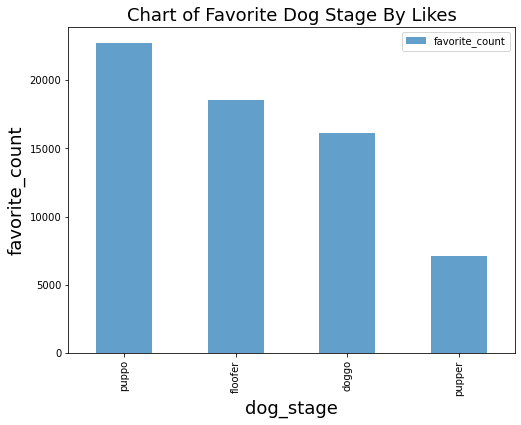

In [54]:
grouped_by_dog_stage = twitter_archive_master.groupby('dog_stage')

# Get mean favorite_count and group by dog stage

favorite_dog_stage = grouped_by_dog_stage.favorite_count.mean().reset_index().sort_values('favorite_count', ascending=False)
#favorite_dog_stage.head()

favorite_dog_stage.plot(kind='bar', x='dog_stage', y='favorite_count', alpha=.7, figsize = (8,6))
plt.ylabel('favorite_count', fontsize=18)
plt.xlabel('dog_stage', fontsize=18)
plt.title('Chart of Favorite Dog Stage By Likes', fontsize=18);

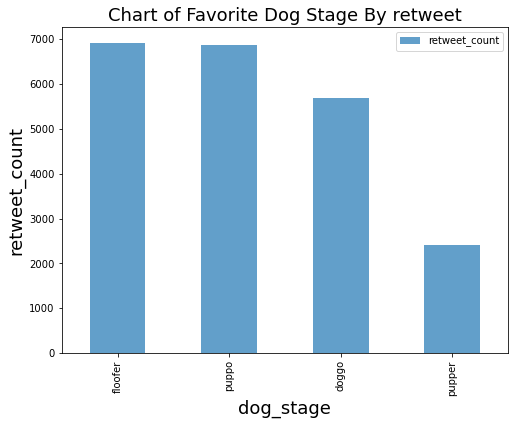

In [55]:

# Get mean favorite_count and group by favorite_count

most_retweeted_dog_stage = grouped_by_dog_stage.retweet_count.mean().reset_index().sort_values('retweet_count', ascending=False)
#favorite_dog_stage.head()

most_retweeted_dog_stage.plot(kind='bar', x='dog_stage', y='retweet_count', alpha=.7, figsize = (8,6))
plt.ylabel('retweet_count', fontsize=18)
plt.xlabel('dog_stage', fontsize=18)
plt.title('Chart of Favorite Dog Stage By retweet', fontsize=18);

#### **Findings**  
From the two charts above there is a clear positive corelation between the Dog stage and the number of likes and retweets a certain tweet gets. Puppo got more likes and retweets and this would infer that people like the teenage version of dogs the most. I will suspect that is because at this stage they are not too needy and also do not cause too much trouble. while pupper got leat likes and retweets and this could be due to the fact that these are smaller dogs and are more difficult to deal with. Floofer understandly got highest retweets on the second chart, this however doesnt change the fact that Puppo is also the most retweeted dog stage. This is because floofer simply means furry dogs. 

### Most Ranked and Least Ranked Dog Stage

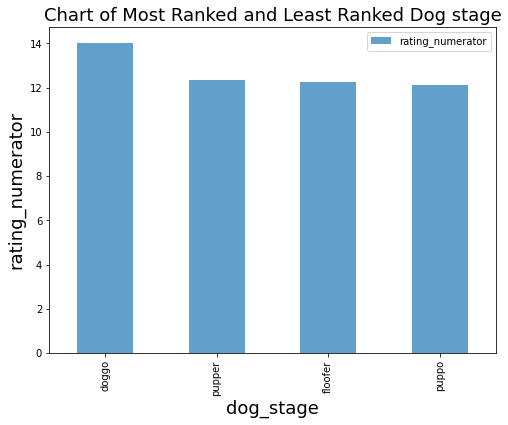

In [56]:
grouped_by_dog_stage = twitter_archive_master.groupby('dog_stage')


most_ranked_dog_stage = grouped_by_dog_stage.rating_numerator.mean().reset_index().sort_values('rating_numerator', ascending=False)
#favorite_dog_stage.head()

most_ranked_dog_stage.plot(kind='bar', x='dog_stage', y='rating_numerator', alpha=.7, figsize = (8,6))
plt.ylabel('rating_numerator', fontsize=18)
plt.xlabel('dog_stage', fontsize=18)
plt.title('Chart of Most Ranked and Least Ranked Dog stage', fontsize=18);

#### **Findings**  
The result of this chart shows that the people that engage with the WeRateDogs twitter page almost always have a contrary opinion of its rating of the dogs. This is because although puppo dog stage get more likes and retweets as seen on the previous analysis, doggo dog stage is the most ranked by the twitter handle, while puppo is the least ranked.

### What Are The Top 10 Most Popular Dog names?

In [57]:
twitter_archive_master.name.value_counts().nlargest(10)

Charlie    11
Lucy       11
Oliver     10
Cooper     10
Penny       9
Tucker      9
Winston     8
Lola        8
Sadie       8
Toby        7
Name: name, dtype: int64

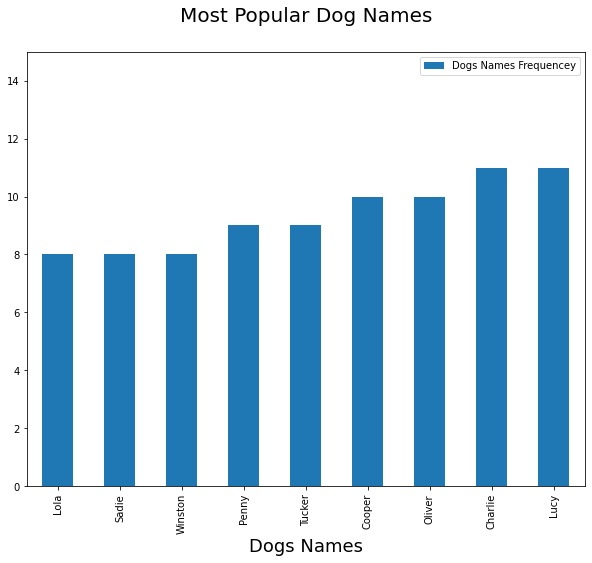

In [58]:
dog_names = twitter_archive_master.query('name == name')
dog_names_grouped = dog_names.groupby('name').count()[['tweet_id']]
dog_names_grouped.rename(columns={'tweet_id':'name_count'}, inplace=True)
dog_names_grouped.query('name_count >= 8').sort_values(by=['name_count']).plot.bar(figsize= (10,8))
plt.ylim(top=15)
plt.title("Most Popular Dog Names",{'fontsize': 20},pad=30)
plt.xlabel("Dogs Names", fontsize = 18)
plt.legend(["Dogs Names Frequencey"]);

### Success rate of prediction algorithm.

In [59]:
# Find success percentage of p1_dog.
twitter_archive_master['p1_dog'].value_counts()

True     1463
False     508
Name: p1_dog, dtype: int64

In [60]:
total_predictions_p1_dog = 1463 + 508
percentage_success_p1_dog = (1532/total_predictions_p1_dog)*100
percentage_success_p1_dog

77.72704211060375

In [61]:
# Find success percentage of p2_dog.
twitter_archive_master['p2_dog'].value_counts()

True     1480
False     491
Name: p2_dog, dtype: int64

In [62]:
total_predictions_p2_dog = 1480 + 491
percentage_success_p2_dog = (1480/total_predictions_p2_dog)*100
percentage_success_p2_dog

75.08878741755454

In [63]:
# Find success percentage of p3_dog.
twitter_archive_master['p3_dog'].value_counts()

True     1431
False     540
Name: p3_dog, dtype: int64

In [64]:
total_predictions_p3_dog = 1431 + 540
percentage_success_p3_dog = (1431/total_predictions_p3_dog)*100
percentage_success_p3_dog

72.6027397260274

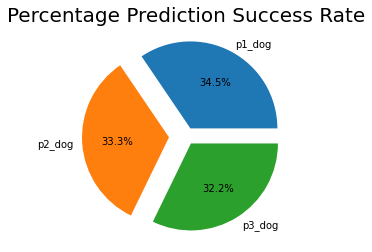

In [65]:
from turtle import title


plt.pie([percentage_success_p1_dog, percentage_success_p2_dog, percentage_success_p3_dog],labels=('p1_dog','p2_dog','p3_dog'), explode = [0.1,0.2,0.1],autopct ='%1.1f%%')
plt.title('Percentage Prediction Success Rate', {'fontsize': 20})
plt.show()

#### **Findings**  
From the analysis above, it is seen that the algorithm's predictions determining if image tweeted is a dog are mostly correct. However, the first predictions of the algorithm are more accurate with **77%** accuracy.